# Tokenization and Stemming
- Select a business b1 randomly from the dataset, then extract all reviews for b1 to form a small dataset B1. 
- Show word frequency distributions in B1 before and after stemming, respectively.
    - You may choose the stemming algorithm implemented in any toolkit. You may consider to plot the word frequency distributions in log-scale. 
- Repeat the same process for another randomly selected business b2.
- Discuss your findings based on your plots.
- List the top-10 most frequent words (exclude stopwords) before and after performing stemming, for each of the two selected businesses. 
- Discuss your findings.
    - note: Stop words are the words that are commonly used but do not carry much semantic meaning such as a, the, of, and.

In [1]:
import json
import pandas as pd
import random
from collections import Counter
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize, RegexpTokenizer
import seaborn as sb
from nltk.corpus import stopwords

In [2]:
# read data
data_path = 'C:\\Users\\tanch\\Documents\\NTU\\NTU Year 3\\Sem 1\\CZ4045 Natural Language Processing\\Assignment 1\\local\\data\\reviewSelected100\\reviewSelected100.json'
reviews = []
with open(data_path,"r") as f:
    for l in f.readlines():
        reviews.append(json.loads(l))

In [3]:
# convert to dataframe
reviews_df = pd.DataFrame(reviews)
reviews_df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,8aoJJdKEO3ypoZNszpPu7Q,bGgAL09pxLnV_FFgR4ZADg,ZBE-H_aUlicix_9vUGQPIQ,5.0,0,0,0,We had my Mother's Birthday Party here on 10/2...,2016-11-09 20:07:25
1,J5NOCLdhuhor7USRhtYZ8w,pFCb-1j6oI3TDjr26h2cJQ,e-YnECeZNt8ngm0tu4X9mQ,4.0,0,0,0,Good Korean grill near Eaton Centre. The marin...,2015-12-05 05:06:43
2,PXiLWAYRt3xnHaJ8MB4rzw,mEzc6LeTNiQgIVsq3poMbg,j7HO1YeMQGYo3KibMXZ5vg,5.0,2,1,3,Was recommended to try this place by few peopl...,2014-10-11 05:16:15
3,VrLarvxZYJm74yAqtpe9PQ,o-zUN2WEZgjQS7jnNsec0g,7e3PZzUpG5FYOTGt3O3ePA,3.0,0,0,0,Ambience: Would not expect something this nice...,2016-07-25 03:45:26
4,C1CUpidlVFprUCkApqzCmA,Wlx0iBXJvk4x0EeOt2Bz1Q,vuHzLZ7nAeT-EiecOkS5Og,1.0,11,0,3,Absolutely the WORST pool company that I have ...,2016-04-11 18:49:11


#### randomly select b1 and b2

In [4]:
print("Number of businesses:", len(reviews_df.business_id.unique()))
random.seed(0)
b1, b2 = random.sample(list(reviews_df.business_id.unique()),2)
print("Randomly selected b1: ", b1)
print("Randomly selected b2: ", b2)

Number of businesses: 153
Randomly selected b1:  a6mYyhGgxWhnhrGDHzOTPA
Randomly selected b2:  0Rni7ocMC_Lg2UH0lDeKMQ


#### extract all B1 and B2 reviews
- i.e reviews for b1 and b2 respectively

In [5]:
B1 = reviews_df.loc[reviews_df.business_id==b1,"text"].tolist()
B2 = reviews_df.loc[reviews_df.business_id==b2,"text"].tolist()

### Cleaning, Tokenization and extracting word frequencies 
- we tokenize using RegexpTokenizer(r"\w+") where:
    - all non-alphanumeric characters are removed (e.g slashes, fullstops and newlines) because we only want word frequencies 
    - each token is an alphanumeric word
- all tokens are converted to lower case
- word frequencies are extracted and stored in Counter objects 

In [6]:
# stores word frequencies
B1_word_frequencies_unstemmed = Counter()
B1_word_frequencies_stemmed = Counter()
B2_word_frequencies_unstemmed = Counter()
B2_word_frequencies_stemmed = Counter()

In [7]:
tokenizer = RegexpTokenizer(r"\w+")
ps = PorterStemmer()

In [8]:
for r in B1:
    review_unstemmed = [token.lower() for token in tokenizer.tokenize(r)]   
    B1_word_frequencies_unstemmed+=Counter(review_unstemmed)      # tokenize, convert to lower case and update unstemmed frequency store
    review_stemmed = [ps.stem(token) for token in review_unstemmed]
    B1_word_frequencies_stemmed+=Counter(review_stemmed)         # stem and update stemmed frequency store

In [9]:
for r in B2:
    review_unstemmed = [token.lower() for token in tokenizer.tokenize(r)]   
    B2_word_frequencies_unstemmed+=Counter(review_unstemmed)      # tokenize, convert to lower case and update unstemmed frequency store
    review_stemmed = [ps.stem(token) for token in review_unstemmed]
    B2_word_frequencies_stemmed+=Counter(review_stemmed)         # stem and update stemmed frequency store

# Word Frequency Distributions (with stopwords)

In [10]:
def bar_plotter(frequencies, title, top_n = 30, logx = False):
    idx, values = zip(*frequencies.most_common(top_n))                 # sort frequencies
    pd.Series(values[::-1],idx[::-1]).plot(kind = "barh",figsize = (8,8),title = title, logx = logx)   # bar plot

### Word frequency distributions in B1 BEFORE stemming

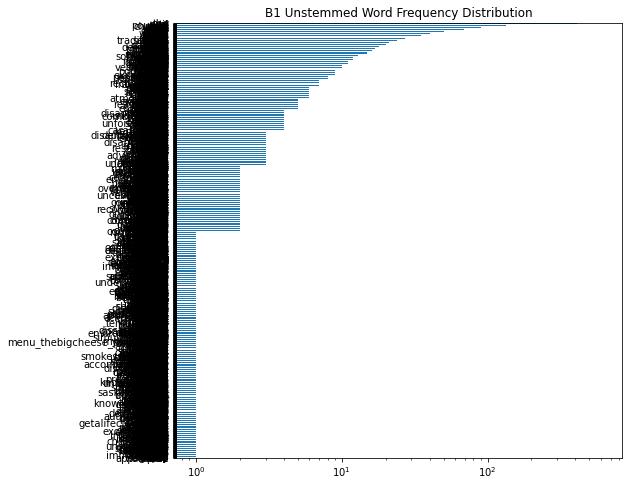

In [13]:
bar_plotter(B1_word_frequencies_unstemmed,
            title = "B1 Unstemmed Word Frequency Distribution",
            top_n = len(B1_word_frequencies_unstemmed),
            logx = True)

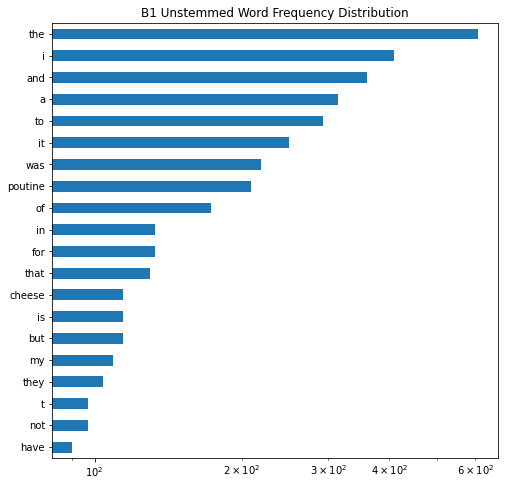

In [14]:
bar_plotter(B1_word_frequencies_unstemmed,
            title = "B1 Unstemmed Word Frequency Distribution",
            top_n = 20,
            logx = True)

### Word frequency distributions in B1 AFTER stemming

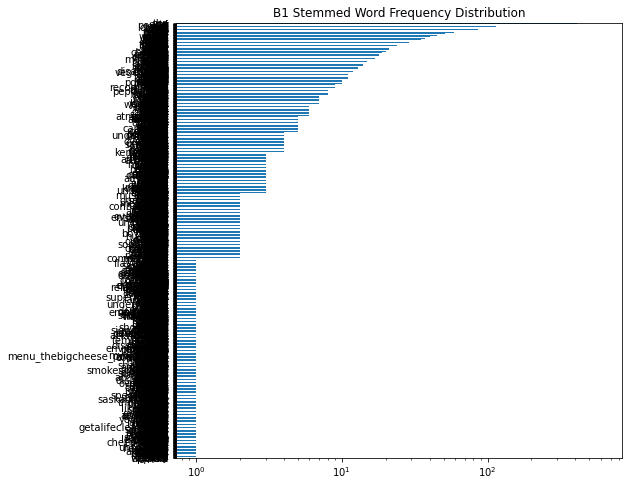

In [15]:
bar_plotter(B1_word_frequencies_stemmed,
            title = "B1 Stemmed Word Frequency Distribution",
            top_n = len(B1_word_frequencies_stemmed),
            logx = True)

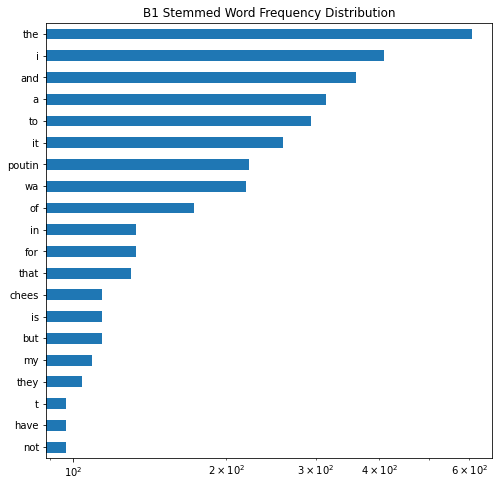

In [12]:
bar_plotter(B1_word_frequencies_stemmed,
            title = "B1 Stemmed Word Frequency Distribution",
            top_n = 20,
            logx = True)

### Word frequency distributions in B2 BEFORE stemming

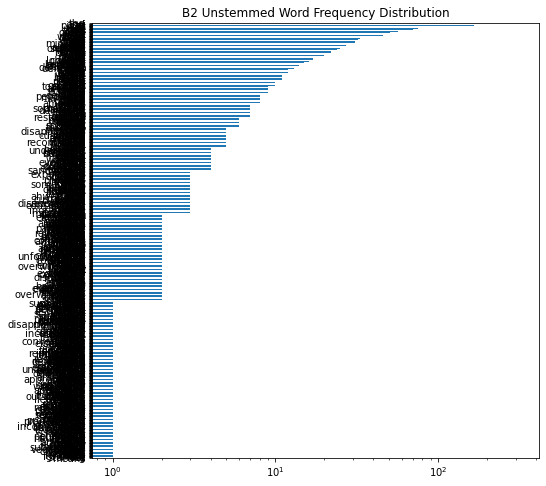

In [23]:
bar_plotter(B2_word_frequencies_unstemmed,
            title = "B2 Unstemmed Word Frequency Distribution",
            top_n = 1000,
            logx = True)

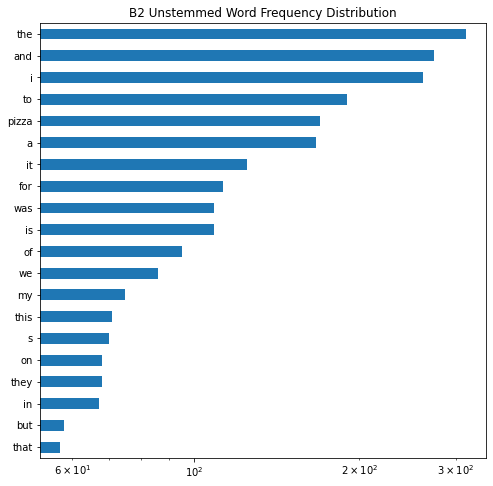

In [13]:
bar_plotter(B2_word_frequencies_unstemmed,
            title = "B2 Unstemmed Word Frequency Distribution",
            top_n = 20,
            logx = True)

### Word frequency distributions in B2 AFTER stemming

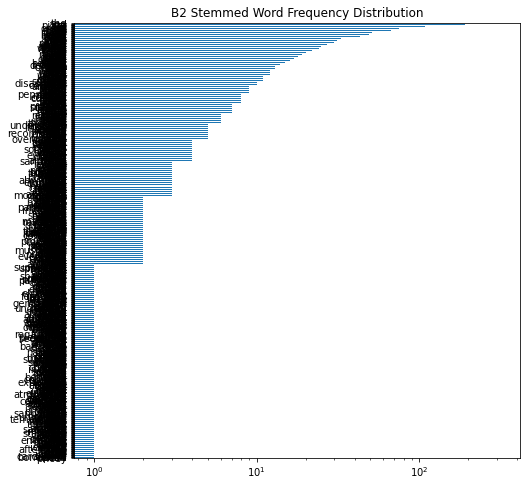

In [17]:
bar_plotter(B2_word_frequencies_stemmed,
            title = "B2 Stemmed Word Frequency Distribution",
            top_n = len(B2_word_frequencies_stemmed),
            logx = True)

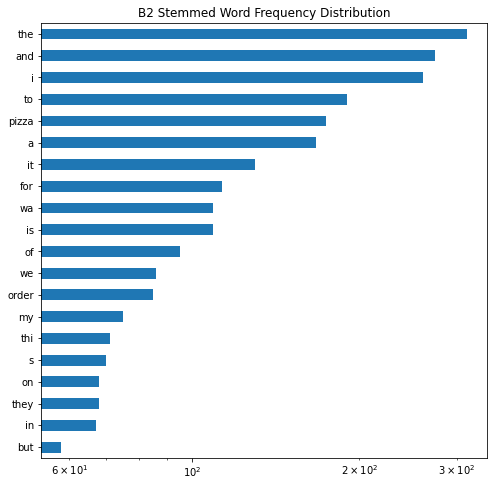

In [14]:
bar_plotter(B2_word_frequencies_stemmed,
            title = "B2 Stemmed Word Frequency Distribution",
            top_n = 20,
            logx = True)

### Cleaning, Tokenization, extracting word frequencies + REMOVE STOPWORDS
- we tokenize using RegexpTokenizer(r"\w+") where:
    - all non-alphanumeric characters are removed e.g slashes, fullstops and newlines
    - each token is an alphanumeric word
- all tokens are converted to lower case
- all stopwords are removed
- word frequencies are extracted and stored in Counter objects 

In [15]:
# stores word frequencies
B1_word_frequencies_unstemmed = Counter()
B1_word_frequencies_stemmed = Counter()
B2_word_frequencies_unstemmed = Counter()
B2_word_frequencies_stemmed = Counter()

In [16]:
tokenizer = RegexpTokenizer(r"\w+")
ps = PorterStemmer()

In [17]:
# get all stopwords
stopwords_list = set(stopwords.words('english'))

In [18]:
for r in B1:
    review_unstemmed = [token.lower() for token in tokenizer.tokenize(r)] # tokenize and lower case 
    review_unstemmed = [token for token in review_unstemmed if token not in stopwords_list] # remove stopwords
    B1_word_frequencies_unstemmed+=Counter(review_unstemmed)      # update unstemmed frequency store
    review_stemmed = [ps.stem(token) for token in review_unstemmed]
    B1_word_frequencies_stemmed+=Counter(review_stemmed)         # stem and update stemmed frequency store

In [19]:
for r in B2:
    review_unstemmed = [token.lower() for token in tokenizer.tokenize(r)] # tokenize and lower case 
    review_unstemmed = [token for token in review_unstemmed if token not in stopwords_list] # remove stopwords
    B2_word_frequencies_unstemmed+=Counter(review_unstemmed)      # update unstemmed frequency store
    review_stemmed = [ps.stem(token) for token in review_unstemmed]
    B2_word_frequencies_stemmed+=Counter(review_stemmed)         # stem and update stemmed frequency store

# Word Frequency Distributions (stopwords removed)

In [20]:
def bar_plotter(frequencies, title, top_n = 30, logx = False):
    idx, values = zip(*frequencies.most_common(top_n))                 # sort frequencies
    pd.Series(values[::-1],idx[::-1]).plot(kind = "barh",figsize = (8,8),title = title, logx = logx)   # bar plot

### Top-10 most frequent words (exclude stopwords) before stemming - B1

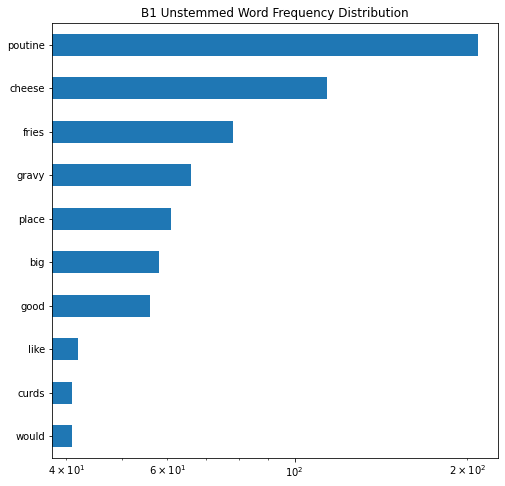

In [21]:
bar_plotter(B1_word_frequencies_unstemmed,
            title = "B1 Unstemmed Word Frequency Distribution",
            top_n = 10,
            logx = True)

### Top-10 most frequent words (exclude stopwords) after stemming - B1

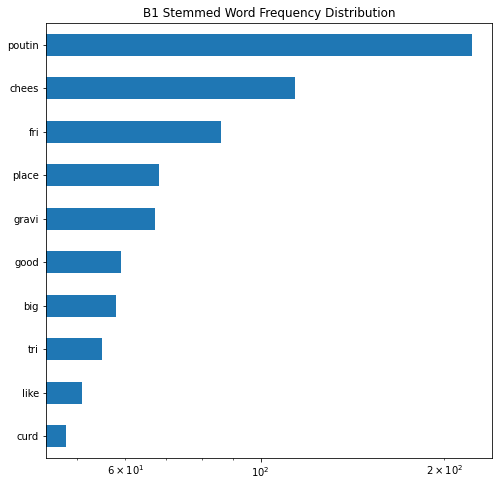

In [22]:
bar_plotter(B1_word_frequencies_stemmed,
            title = "B1 Stemmed Word Frequency Distribution",
            top_n = 10,
            logx = True)

### Top-10 most frequent words (exclude stopwords) before stemming - B2

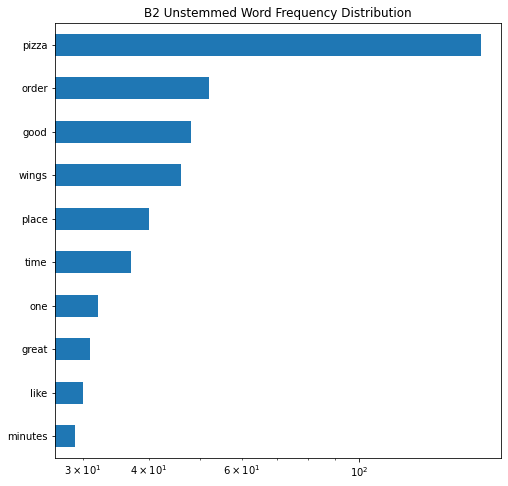

In [23]:
bar_plotter(B2_word_frequencies_unstemmed,
            title = "B2 Unstemmed Word Frequency Distribution",
            top_n = 10,
            logx = True)

### Top-10 most frequent words (exclude stopwords) after stemming - B1

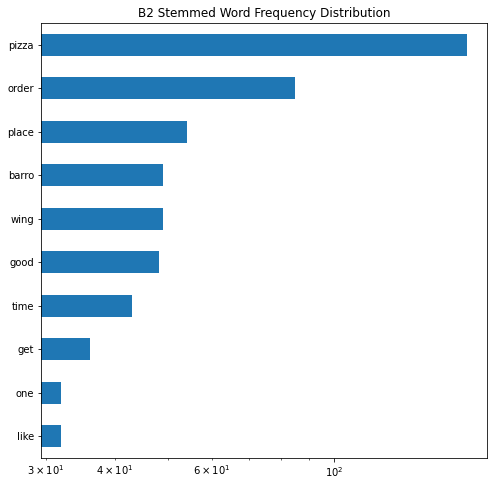

In [24]:
bar_plotter(B2_word_frequencies_stemmed,
            title = "B2 Stemmed Word Frequency Distribution",
            top_n = 10,
            logx = True)